In [1]:
%matplotlib inline

import numpy as np
from __future__ import division

import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (15,15)
plt.rcParams['axes.grid'] = False

#import cv2

import logging
logger = logging.getLogger()

第三章 利用数值修正颜色
===========
每次修正都在可能的范围内使用全阶调（在可以达到的明暗范围内，让黑场足够黑，白场足够白），而且不要让观赏者觉得还有更好的颜色。

数值方法是色彩修正不可或缺的起点。

黑色、白色和灰色被看作中性灰（在RGB空间中，三个通道完全相同）。

测量单个点可能被误导，选用多个位置点。

### 3.1 使用数值
从亮到暗，在动物脸上选取四个点。把曲线中间的点升高或者降低，同时观察信息面板的变化，直到：
$$132^R 138^G 92^B \to 115^R 115^G 115^B$$
$$34^R 39^G 17^B \to 15^R 15^G 15^B$$
每个点的三通道数值基本接近，恢复到中性色，此时「均衡」。

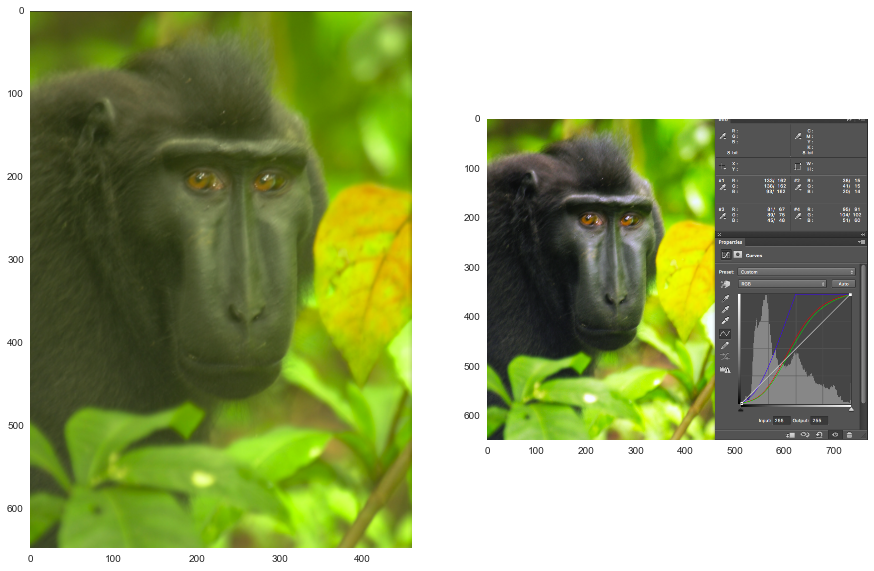

In [4]:
plt.subplot(1,2,1)
plt.imshow(plt.imread('./res/fig3_2/A.png'))

plt.subplot(1,2,2)
plt.imshow(plt.imread('./res/fig3_2/B.png'))

与作者不同，我提亮了高光区到 $162^R 162^G 162^B$，注意观察背景黄色树叶由黄绿交错变成了纯黄色。

总之，思路是：     
曲线上对应于短尾猿的区段应该是最陡的（对比度），而红、绿、蓝曲线之间的均衡产生了中性灰（色偏）。

术语：     
从最亮到最暗，我们称之为高光、1/4调、中间调、3/4调和阴影。

### 3.2 系统设置
1. 取样范围使用$3 \times 3$或者$5 \times 5$。

### 3.3 数值魔法
实际的青黑会反射一些红光 $\to$ CMYK空间中，中性灰要求品红和黄色数值一致，但青色的数值要高些（吸收更多红光来均衡）。

阴影和高光的极值是根据印刷/显示设备能呈现的细节效果而定。

#### 阴影
RGB推荐值是$15^R 15^G 15^B$。

CMYK推荐值

+ 当印刷条件较好时，可用较高的值$80^C 70^M 70^Y 70^K$，其总量是290%。SWMOP制定的油墨总量上限是300%，而印刷杂志常常是280%。

+ 对于新闻纸及一些喷墨打印机，若需要更低的油墨总量上限，如240%，就减少CMY，同时增加黑色，以保持阴影的深度。

+ 在暗调，人眼对色彩变化的敏感度变弱。不得已情况下，可以减少一种或两种墨，但阴影色彩不平衡可能带来其它区域也出现偏色。


#### 高光
RGB推荐值是$255^R 255^G 255^B$。

CMYK推荐值是$5^C 2^M 2^Y$，也有其它推荐值，但青色总是稍高以保证中性。人类视觉系统对浅色非常敏感，任何一种墨有3、4个点的变化都会引起让人无法接受的色偏。

阴影和高光必然保持中性。

### 3.4 寻找确定的事情
猜测和推理出可能正确的色彩，结合拍摄时的信息印证。

#### 肤色
对于肤色来说，黄色至少应该和品红一样多，极端情况下会多出1/3。    

+ 对于亚洲人，通常黄色比品红高10%到15%；青色从品红的1/4开始，甚至可超过其1/3。

+ 除非是非洲裔人种，一般肤色中用不着黑墨。     
  黑墨和青墨在肤色中，主要作用是：抵消红色，把颜色变灰。

定位和测量肤色：   

1. 仅选择正常光照下的皮肤来测量，不要选择阴影或半反光。     

2. 避免测量有可能化过妆的部分，如女性的两颊。


在调整RGB空间时，可利用信息面板查看CMYK空间值，从而观察和调整肤色。

### 3.5 拾取重要目标点
为了确定高光和阴影，使用光标经过画面上所有潜在区域并观察信息面板。

数值方法的4条规则是关于阴影、高光、中性灰和肤色的。

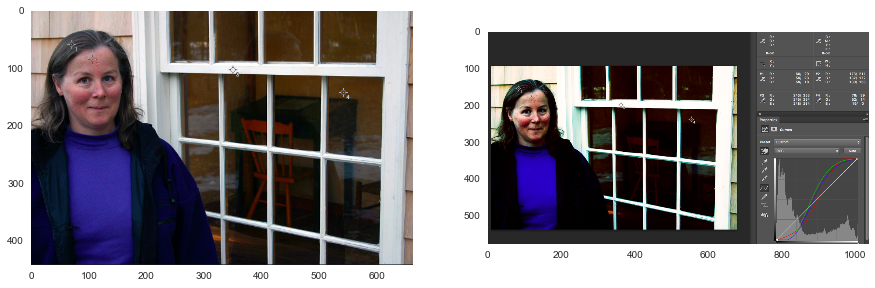

In [2]:
plt.subplot(1,2,1)
plt.imshow(plt.imread('./res/fig3_8/A.png'))

plt.subplot(1,2,2)
plt.imshow(plt.imread('./res/fig3_8/B.png'))

调整得比较失败，头发的颜色和窗子里面墙壁在红色段有重叠，没找到好的方法消除暗部的红色色偏。

### 3.6 主体的最亮部分
高光：老人的灰色头发

阴影：最暗部

提高面部的陡度，微调头发略偏棕。

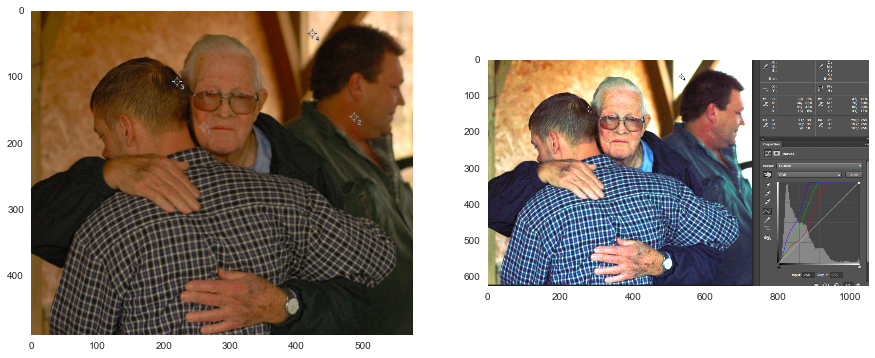

In [3]:
plt.subplot(1,2,1)
plt.imshow(plt.imread('./res/fig3_10/A.png'))

plt.subplot(1,2,2)
plt.imshow(plt.imread('./res/fig3_10/B.png'))

### 3.7 适度的建议
使用曲线的代价是牺牲其它区域的细节，有两个解决方法找回细节：

1. 使用蒙版：将想保留细节的区域涂上浅色。

2. 曲线使用"S"线，而非直接拉平。

### 3.8 用图说话
重点是马，所以高光在马的前额白色部分，阴影在马的眼罩附近（黑色的中性灰）。

针对马，它在亮部偏红，故调节亮部点：拉低品红，略拉高青色和黄色，达到中性灰。     
在暗部处红色不足，故调节暗部点：拉高品红，达到中性灰。    
微调：在中部分别拉低青色，拉高品红，调整在明暗区间的分配比。     

对比度：拉高黑色通道的细节。


### 3.9 图像的博弈
修色的关键是要避免使用不可能正确的数值。

绿色几乎是与黄色为伴的。自然界中偏青的绿色很少见，通常黄色比青色的一半更多。     
总的是偏绿的黄色，而不是偏黄的绿色。

肤色：品红和黄色通常是等量的，有时黄比品红多。偏品红的肤色是很少出现的。

自然界中的蓝色含较多的青色。大多数天空被认为是蓝青色，而不是青蓝色。

这些规则是CMYK数值，而不适用于RGB，因为蓝色通道比黄色通道亮，所以建议在信息面板增加CMYK模式。

聪明的润饰师并非总是精确地知道该使用什么数值，而是会问可疑区域的色彩是可能正确的么。答案是不可能的话，就必须改变这些数值。

### 3.10 让爱尔兰岛变个颜色
若CMY中有一种墨明显多于另外两种，则总的颜色接近原色，即青、品红或黄。     
若CMY中有两种墨明显地多于另外一种，则总的颜色接近间色，即红、绿或蓝。


#### 测量结果
| 区域 | 数值 | 位置 | 说明 | 修正 |
|------|-----|----|-------|-----|
| 高光 | $16^C 7^M 2^Y$ | 天空 | 偏蓝的青色 | 提亮，偏蓝: $6^C 2^M 0^Y$或$7^C 3^M 0^Y$ |
| 阴影 | $80^C 64^M 71^Y 75^K$ | 门洞 | 偏绿 | 中性灰，$80^C 70^M 70^Y 70^K$ |
| 青草 | $37^C 21^M 86^Y 1^K$ | | 偏绿的黄色 | 偏绿 |
| 城堡 | $39^C 48^M 70^Y$ | 棕色区域 | 偏红的黄色 | 偏黄的红色 |
| 大海 | $52^C 28^M 13^Y 1^K$|  | 偏蓝的青色 |

#### 调整思路 
+ 青色：提高高光；提升中间调，给草中加入更多青色；变陡城堡所在曲线。

+ 品红：提高高光；降低1/4调，减少草中品红；升高3/4调，增加城堡中品红。

+ 黄色：减少每一处的黄色，减轻城堡和草之间的不平衡。

+ 黑色：加重黑色，让城堡和草所在曲线更陡。

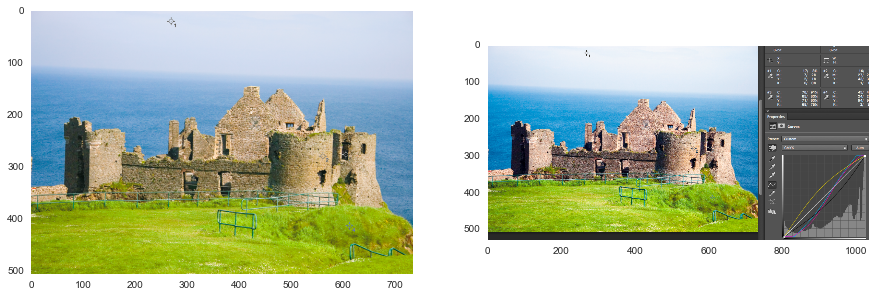

In [2]:
plt.subplot(1,2,1)
plt.imshow(plt.imread('./res/fig3_14/A.png'))

plt.subplot(1,2,2)
plt.imshow(plt.imread('./res/fig3_14/B.png'))

确实不会用CMYK空间，瞎调成这样吧